In [1]:
import pandas as pd
import numpy as np 
import copy
from matplotlib import pyplot as plt
import seaborn as sns
from collections import *
from scipy.stats import pearsonr 

In [2]:
data=pd.read_csv(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\monthly_case_series\coviddata_may.csv")
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,01-May,2396,37262,962,10021,77,1231
1,02-May,2564,39826,831,10852,92,1323
2,03-May,2952,42778,911,11763,140,1463
3,04-May,3656,46434,1082,12845,103,1566
4,05-May,2971,49405,1295,14140,128,1694


In [3]:
def chk_dirt(dt):
    drt_cnt=0
    if(len(dt.columns)):
        for i in list(dt.columns):
            if((True== "NaN" in dt[i])or (True == "" in dt[i]) or (True == " " in dt[i]) or (True == "?" in  dt[i])or (True == "####" in dt[i])):
                drt_cnt+=1
        if(drt_cnt):
            print("Unwanted Data Value Found")
    else:
        print("No Columns available to deal with or columns mixed with rows")

chk_dirt(data)

In [4]:
data[data.duplicated()]

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased


In [5]:
data.dtypes

Date               object
Daily Confirmed     int64
Total Confirmed     int64
Daily Recovered     int64
Total Recovered     int64
Daily Deceased      int64
Total Deceased      int64
dtype: object

In [6]:
data.ndim

2

In [7]:
data.describe()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,5025.258065,99658.774194,2671.064516,39262.129032,137.161290,3039.580645
std,1855.868727,45919.692269,2008.523686,24219.678486,42.790261,1215.692060
min,2396.000000,37262.000000,831.000000,10021.000000,77.000000,1231.000000
25%,3577.000000,61277.500000,1444.500000,18594.000000,104.000000,2043.500000
50%,4628.000000,90649.000000,2482.000000,34257.000000,134.000000,2872.000000
75%,6475.000000,134980.500000,3225.500000,56051.500000,151.000000,3945.000000
max,8789.000000,190649.000000,11735.000000,91862.000000,269.000000,5406.000000


In [8]:
###beginning the task of analysis(visually and quantitatively )

In [9]:
pcol=['Daily Confirmed','Daily Recovered','Daily Deceased']
tcol=['Total Confirmed','Total Recovered','Total Deceased']

In [10]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            a=len(data)*(np.sum(data[pcol[j]]*data[pcol[k]]))
            b=np.sum(data[pcol[j]])
            c=np.sum(data[pcol[k]])
            d=len(data)*np.sum(data[pcol[j]]**2)
            e=b**2
            f=len(data)*np.sum(data[pcol[k]]**2)
            g=c**2
            r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
            
            print(pcol[j])
            if(k!=3):
                print(pcol[k])
            else:
                print(pcol[k-2])
                
            print(r)
            k=k+1
    else:
        a=len(data)*(np.sum(data[pcol[i]]*data[pcol[i+1]]))
        b=np.sum(data[pcol[i]])
        c=np.sum(data[pcol[i+1]])
        d=len(data)*np.sum(data[pcol[i]]**2)
        e=b**2
        f=len(data)*np.sum(data[pcol[i+1]]**2)
        g=c**2
        k=j+2
        r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
        print(pcol[i])
        print(pcol[i+1])
        print(r)
        
            

Daily Confirmed
Daily Recovered
-3.95298588679345e-10
Daily Confirmed
Daily Deceased
1.1650479959265315e-08
Daily Recovered
Daily Deceased
1.0649724819905297e-08


<ipython-input-10-e405aa859196>:13: RuntimeWarning: overflow encountered in longlong_scalars
  r=((a)-(b*c))/(((d)-(e))*((f)-(g)))


In [11]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            coef,pval=pearsonr(data[pcol[j]],data[pcol[k]])
            print(pcol[j]+" Vs."+pcol[k])
            print(coef)
            print(pval)
            k=k+1
    else:
        coef,pval=pearsonr(data[pcol[i]],data[pcol[i+1]])
        print(pcol[i]+" Vs."+pcol[i+1])
        print(coef)
        print(pval)

Daily Confirmed Vs.Daily Recovered
0.7331243849047316
2.72251311266278e-06
Daily Confirmed Vs.Daily Deceased
0.8604367605491055
5.446091665483841e-10
Daily Recovered Vs.Daily Deceased
0.8512227643197399
1.2933120831725777e-09


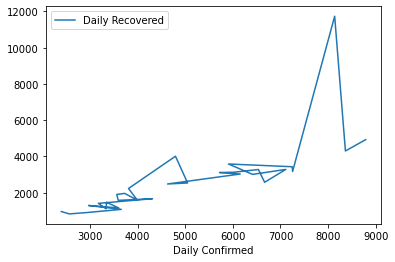

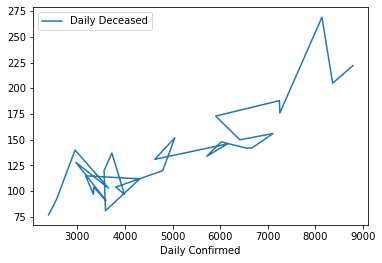

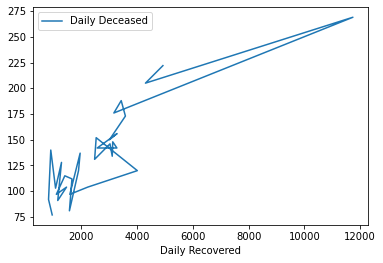

In [12]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            data.plot(x=pcol[j],y=pcol[k])
            k=k+1
    else:
        data.plot(x=pcol[i],y=pcol[i+1])

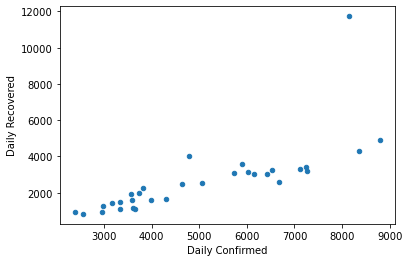

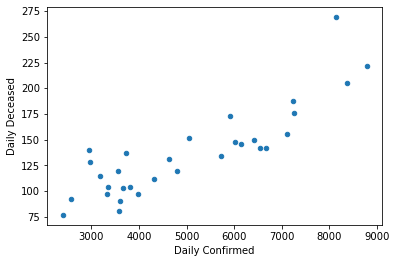

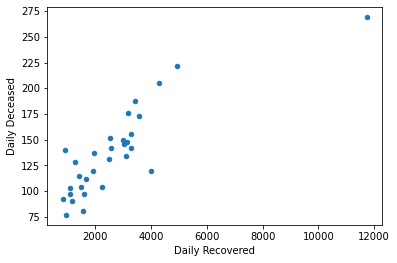

In [13]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            data.plot(x=pcol[j],y=pcol[k],kind="scatter")
            k=k+1
    else:
        data.plot(x=pcol[i],y=pcol[i+1],kind="scatter")

In [14]:
for i in range(len(tcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(tcol)):
            a=len(data)*(np.sum(data[tcol[j]]*data[tcol[k]]))
            b=np.sum(data[tcol[j]])
            c=np.sum(data[tcol[k]])
            d=len(data)*np.sum(data[tcol[j]]**2)
            e=b**2
            f=len(data)*np.sum(data[tcol[k]]**2)
            g=c**2
            r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
            
            print(tcol[j])
            if(k!=3):
                print(tcol[k])
            else:
                print(tcol[k-2])
                
            print(r)
            k=k+1
    else:
        a=len(data)*(np.sum(data[tcol[i]]*data[tcol[i+1]]))
        b=np.sum(data[tcol[i]])
        c=np.sum(data[tcol[i+1]])
        d=len(data)*np.sum(data[tcol[i]]**2)
        e=b**2
        f=len(data)*np.sum(data[tcol[i+1]]**2)
        g=c**2
        k=j+2
        r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
        print(tcol[i])
        print(tcol[i+1])
        print(r)
        
            

Total Confirmed
Total Recovered
-1.8970675730185749e-07
Total Confirmed
Total Deceased
2.4691804393888546e-08
Total Recovered
Total Deceased
-4.175310169379924e-09


<ipython-input-14-2344589cd845>:13: RuntimeWarning: overflow encountered in longlong_scalars
  r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
<ipython-input-14-2344589cd845>:32: RuntimeWarning: overflow encountered in longlong_scalars
  r=((a)-(b*c))/(((d)-(e))*((f)-(g)))


In [15]:
for i in range(len(tcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(tcol)):
            coef,pval=pearsonr(data[tcol[j]],data[tcol[k]])
            print(tcol[j]+" Vs."+tcol[k])
            print(coef)
            print(pval)
            k=k+1
    else:
        coef,pval=pearsonr(data[tcol[i]],data[tcol[i+1]])
        print(tcol[i]+" Vs."+tcol[i+1])
        print(coef)
        print(pval)

Total Confirmed Vs.Total Recovered
0.9959585946237296
6.539731425798265e-32
Total Confirmed Vs.Total Deceased
0.9985212760339786
3.0991273236912505e-38
Total Recovered Vs.Total Deceased
0.9924890770036454
5.115096123881432e-28


In [16]:
for i in range(len(tcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(tcol)):
            coef,pval=pearsonr(data[tcol[j]],data[tcol[k]])
            print(tcol[j]+" Vs."+tcol[k])
            print(coef)
            print(pval)
            k=k+1
    else:
        coef,pval=pearsonr(data[tcol[i]],data[tcol[i+1]])
        print(tcol[i]+" Vs."+tcol[i+1])
        print(coef)
        print(pval)

Total Confirmed Vs.Total Recovered
0.9959585946237296
6.539731425798265e-32
Total Confirmed Vs.Total Deceased
0.9985212760339786
3.0991273236912505e-38
Total Recovered Vs.Total Deceased
0.9924890770036454
5.115096123881432e-28


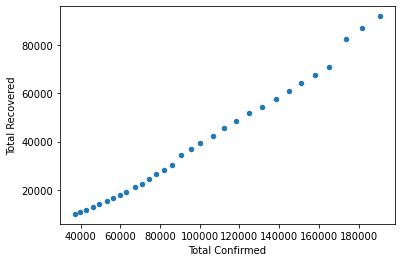

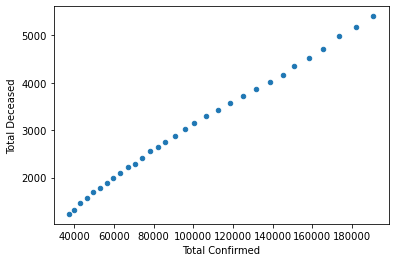

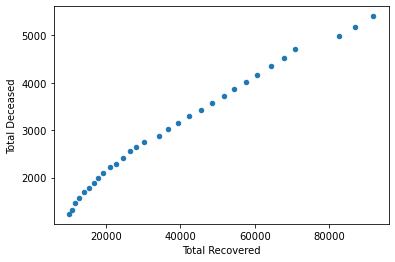

In [17]:
for i in range(len(tcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(tcol)):
            data.plot(x=tcol[j],y=tcol[k],kind="scatter")
            k=k+1
    else:
        data.plot(x=tcol[i],y=tcol[i+1],kind="scatter")

In [18]:
colls=list(data.columns)
colls.pop(0)
for c in colls:
    min(data[c])
    max(data[c])
    rnge_list=[]
    dys_cnt={}
    
    for i in range(1,len(str(max(data[c])))):
        rnge_list.append(10**i)
    cnt1=0

    for i in list(data[c]):

        if(len(str(i))<2 or len(str(i))==2):
            cnt1=cnt1+1
            dys_cnt.update({str(rnge_list[0]):cnt1})
        else:
            cnt1=cnt1+1
            dys_cnt.update({str(rnge_list[len(str(i))-2]):cnt1})

    if(len(list(dys_cnt.keys()))>1):
        itr_lst=list(range(1,len(list(dys_cnt.keys()))))
        itr_lst.sort(reverse=True)
        for i in itr_lst:
            dys_cnt[list(dys_cnt.keys())[i]]=dys_cnt[list(dys_cnt.keys())[i]]-dys_cnt[list(dys_cnt.keys())[i-1]]        

    print("For: "+c)
    print(pd.DataFrame(dys_cnt,index=[0]))
    print("\n")
    

For: Daily Confirmed
   1000
0    31


For: Total Confirmed
   10000  100000
0     17      14


For: Daily Recovered
   100  1000  10000
0    3    28     -2


For: Total Recovered
   10000
0     31


For: Daily Deceased
   10  100
0  14   17


For: Total Deceased
   1000
0    31




In [19]:
colls=list(data.columns)
colls.pop(0)
for c in colls:
    min(data[c])
    max(data[c])
    rnge_list=[]
    dys_cnt={}

    for i in range(1,len(str(max(data[c])))):
        rnge_list.append(10**i)
    cnt1=0


    for i in list(data[c]):

        if(len(str(i))<2 or len(str(i))==2):
            cnt1=cnt1+1
            dys_cnt.update({str(rnge_list[0]):cnt1})
        else:
            cnt1=cnt1+1
            dys_cnt.update({str(rnge_list[len(str(i))-2]):cnt1})

            

    print("For: "+c)
    print(pd.DataFrame(dys_cnt,index=[0]))
    print("\n")
    

For: Daily Confirmed
   1000
0    31


For: Total Confirmed
   10000  100000
0     17      31


For: Daily Recovered
   100  1000  10000
0    3    31     29


For: Total Recovered
   10000
0     31


For: Daily Deceased
   10  100
0  14   31


For: Total Deceased
   1000
0    31


